In [116]:
import numpy as np
n_trials = 10000
eps = 0.02 # lesser than this explore
bandit_prob = [0.2,0.5,0.8]

rewards = np.zeros(n_trials)

In [117]:
class Bandit:
    """
    This is the class for storing the Action object
    """
    def __init__(self,p):
        self.p = p #True prob - will be given to you
        self.p_estimate = 0. # Estimated prob - start with zero as we don't know what to start with - Q n+1
        self.N = 0.
        
    def pull(self):
        return np.random.random() < self.p
        
    def update(self, x):
        # x is the reward r
        self.N += 1 # Number of times a particular action has been taken
        self.p_estimate = self.p_estimate + (1/self.N)*(x - self.p_estimate)

        

In [118]:
bandits = [Bandit(b) for b in bandit_prob]

In [119]:
bandits[0].p

0.2

In [120]:
for i in range(n_trials):

    rand = np.random.random()

    if rand<eps:
        action = np.random.choice([0,1,2])
    else:
        action = np.argmax([b.p_estimate for b in bandits])

    reward = int(bandits[action].pull()) # reward if True
    bandits[action].update(reward)

    rewards[i] = reward

    

In [121]:
np.argmax([b.p_estimate for b in bandits])

np.int64(2)

In [122]:
bandits[0].p_estimate

0.19369369369369366

In [123]:
rewards

array([1., 0., 0., ..., 0., 0., 1.], shape=(10000,))

In [124]:
cumulative_reward = np.cumsum(rewards)/(np.arange(n_trials) + 1)

In [125]:
import matplotlib.pyplot as plt

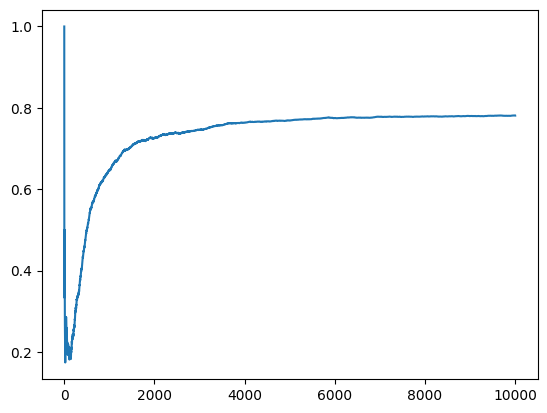

In [126]:
plt.plot(cumulative_reward)
